In [2]:
import matplotlib.pyplot as plt
import mplcursors as mpc
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression

from functools import partial

%matplotlib widget
#plt.style.use('ggplot')


In [3]:
from collections import namedtuple

# Define a named tuple called 'Point'
Point = namedtuple('Point', ['x', 'y'])


In [4]:
class InteractiveLinearRegression:
    def __init__(self, points=[]):
        self.model = LinearRegression()
        self.points = points
        fig, ax = plt.subplots()
        self.fig = fig
        self.ax = ax
        self.fig.canvas.mpl_connect('button_press_event', partial(self.__class__.onclick, self))
        self.__clear_ax()
        if self.points:
            self.__update_model()
            self.redraw()
        

    def __update_model(self):
        self.model.fit(
            np.array([p.x for p in self.points]).reshape(-1,1),
            np.array([p.y for p in self.points]).reshape(-1,1),
        )
    
    def __clear_ax(self):
        self.ax.clear()
        self.ax.set_xlim(0, 100)
        self.ax.set_ylim(0, 100)

    def __plot_points(self):
        self.ax.plot([p.x for p in self.points], [p.y for p in self.points], 'ro')  # 'ro' specifies a red circle marker

    def __plot_line(self):
        self.ax.plot([0, 100], self.model.predict([[0], [100]]))

    def redraw(self):
        self.__clear_ax()
        self.__plot_points()
        self.__plot_line()
        plt.show()
                
    def add_point(self, point):
        self.points.append(point)
        self.__update_model()

    def onclick(self, event):
        # Update the plot with the new point
        if event.button == 1:  # Left mouse button (1) clicked
            self.add_point(Point(event.xdata, event.ydata))
            self.redraw()

    def cleanup(self):
        plt.close(self.fig)



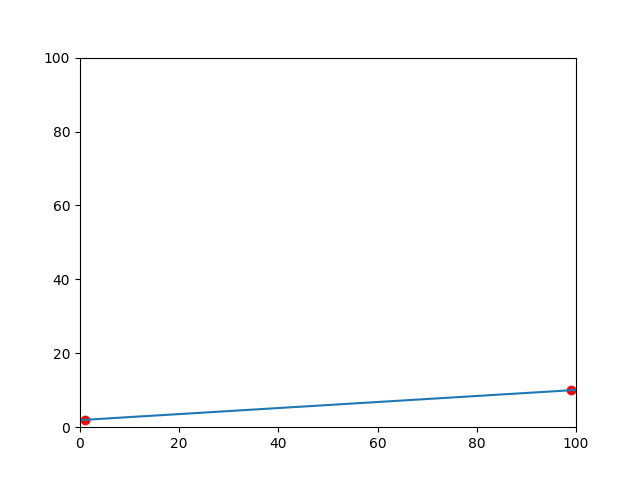

In [5]:
interactive_linear_regression = InteractiveLinearRegression(points=[Point(1,2), Point(99, 10)])

In [6]:
interactive_linear_regression.cleanup()
del interactive_linear_regression